In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams['font.size'] = 17.0
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['font.family'] = 'serif'
from IPython.display import display, Math
import pylab
plt.rcParams['font.family'] = 'serif'
#plt.style.use('seaborn-whitegrid')

In [2]:
data=pd.read_csv('FluxData_without.csv',sep=',',engine='python')

In [3]:
data

,ObsID,N(10^22),N error +,N error -,Th,Th error(+),Th error(-),Th norm,Error +,Error -,Tl,Tl error(+),Tl error(-),norm,norm error +,norm error -,chi
0,840990101,0.075184,0.036285,-0.026425,1.08278,0.092954,-0.072784,0.011758,0.004120,-0.003723,0.281666,0.103765,-0.063403,0.766506,1.964130,-0.501825,276.38/255
1,861600101,0.075547,0.010907,-0.009816,1.30778,0.098720,-0.083397,0.007761,0.002694,-0.002167,0.317233,0.024349,-0.022834,2.408400,1.003490,-0.672215,739.11/708
2,804670201,0.100739,0.077784,-0.051869,1.12776,0.254188,-0.158017,0.005863,0.005551,-0.003625,0.260440,0.113827,-0.066152,1.417770,9.108190,-1.298570,71.93/104
3,804670301,0.065136,0.020483,-0.016188,1.36986,0.471246,-0.226673,0.002243,0.001887,-0.001677,0.444270,0.110176,-0.101017,0.158264,0.243220,-0.079097,310.06/232
4,804670401,0.114642,0.074698,-0.051858,1.11486,0.137950,-0.094267,0.008418,0.004062,-0.003588,0.243846,0.118703,-0.057729,2.006150,10.781700,-1.724730,167.91/159
5,804670501,0.054315,0.023716,-0.023512,1.03892,0.077874,-0.070903,0.012387,0.004353,-0.003274,0.306613,0.000000,0.000000,0.259790,0.196713,-0.186730,157.97/178
6,804670601,0.137273,0.063250,-0.050810,1.09784,0.077329,-0.067056,0.013128,0.004206,-0.003497,0.204129,0.061778,-0.034742,6.322580,20.481200,-5.104700,209.10/200
7,823410401,0.076144,0.023336,-0.017676,1.55748,0.116213,-0.080483,0.016490,0.004201,-0.004587,0.376824,0.133831,-0.081727,0.843476,1.787670,-0.572890,576.81/574
8,804670701,0.031288,0.032654,-0.021380,1.49755,1.038440,-0.299526,0.003008,0.004395,-0.002339,0.477995,0.219374,-0.163104,0.130251,0.373701,-0.073939,127.57 /140
9,823410301,0.074196,0.045846,-0.028793,1.60433,0.459659,-0.133882,0.015553,0.006421,-0.009871,0.339864,0.342178,-0.110496,1.347800,5.935380,-0.924186,289.78/314


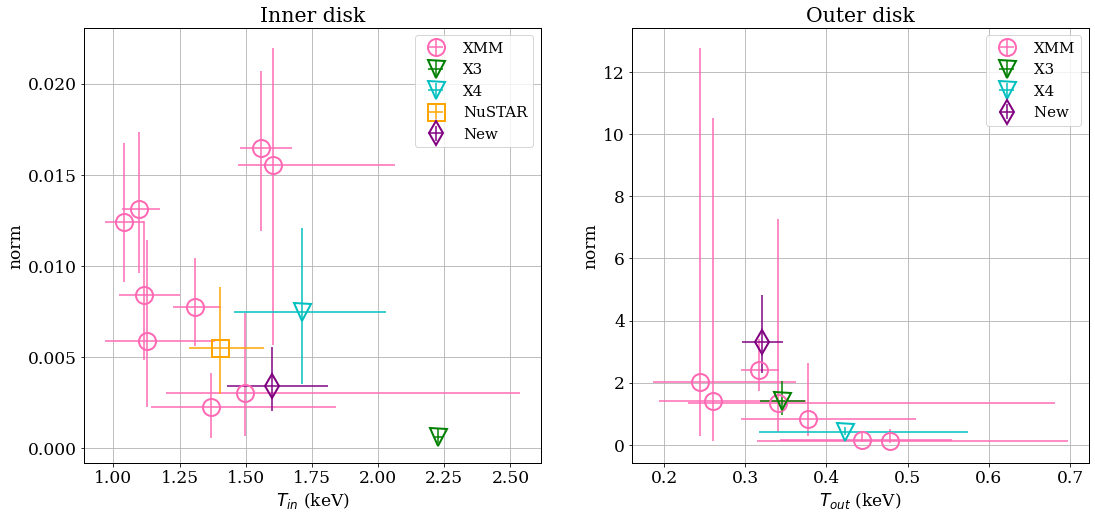

In [4]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 8))

markers=['o','v','s','d']
colour=['hotpink','green','c','orange','purple']
labels=['XMM','X3','X4','NuSTAR','New']

ax[0].errorbar(data['Th'][1:10],data['Th norm'][1:10],xerr=[abs(data['Th error(-)'][1:10]).tolist(),data['Th error(+)'][1:10].tolist()],yerr=[abs(data['Error -'][1:10]).tolist(),data['Error +'][1:10].tolist()], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2, label='XMM')
ax[0].errorbar(data['Th'][11],data['Th norm'][11],xerr=[[abs(data['Th error(-)'][11])],[data['Th error(+)'][11]]],yerr=[[abs(data['Error -'][11])],[data['Error +'][11]]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')
ax[0].errorbar(data['Th'][12],data['Th norm'][12],xerr=[[abs(data['Th error(-)'][12])],[data['Th error(+)'][12]]],yerr=[[abs(data['Error -'][12])],[data['Error +'][12]]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')
ax[0].errorbar(data['Th'][13],data['Th norm'][13],xerr=[[abs(data['Th error(-)'][13])],[data['Th error(+)'][13]]],yerr=[[abs(data['Error -'][13])],[data['Error +'][13]]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')
ax[0].errorbar(data['Th'][14],data['Th norm'][14],xerr=[[abs(data['Th error(-)'][14])],[data['Th error(+)'][14]]],yerr=[[abs(data['Error -'][14])],[data['Error +'][14]]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
ax[0].set_xlabel(r'$T_{in}$ (keV)')
ax[0].set_ylabel('norm')
ax[0].set_title('Inner disk')
ax[0].legend(fontsize=15)



ax[1].errorbar(data['Tl'][1:5],data['norm'][1:5],xerr=[abs(data['Tl error(-)'][1:5]).tolist(),data['Tl error(+)'][1:5].tolist()],yerr=[abs(data['norm error -'][1:5]).tolist(),data['norm error +'][1:5].tolist()], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2, label='XMM')
#ax[1].errorbar(data['Tl'][6],data['norm'][6],xerr=[[abs(data['Tl error(-)'][6])],[data['Tl error(+)'][6]]],yerr=[[abs(data['norm error -'][6])],[data['norm error +'][6]]], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'?')
ax[1].errorbar(data['Tl'][7:10],data['norm'][7:10],xerr=[abs(data['Tl error(-)'][7:10]).tolist(),data['Tl error(+)'][7:10].tolist()],yerr=[abs(data['norm error -'][7:10]).tolist(),data['norm error +'][7:10].tolist()], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2)
ax[1].errorbar(data['Tl'][11],data['norm'][11],xerr=[[abs(data['Tl error(-)'][11])],[data['Tl error(+)'][11]]],yerr=[[abs(data['norm error -'][11])],[data['norm error +'][11]]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 ')
ax[1].errorbar(data['Tl'][12],data['norm'][12],xerr=[[abs(data['Tl error(-)'][12])],[data['Tl error(+)'][12]]],yerr=[[abs(data['norm error -'][12])],[data['norm error +'][12]]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4 ')
#ax[1].errorbar(data['Tl'][13],data['norm'][13],xerr=[[abs(data['Tl error(-)'][13])],[data['Tl error(+)'][13]]],yerr=[[abs(data['norm error -'][13])],[data['norm error +'][13]]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR ')
ax[1].errorbar(data['Tl'][14],data['norm'][14],xerr=[[abs(data['Tl error(-)'][14])],[data['Tl error(+)'][14]]],yerr=[[abs(data['norm error -'][14])],[data['norm error +'][14]]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New ')
ax[1].set_xlabel(r'$T_{out}$ (keV)')
ax[1].set_ylabel('norm')
ax[1].set_title('Outer disk')
ax[1].legend(fontsize=15)

ax[0].grid()
ax[1].grid()
plt.show()
    

## - Norm formula.
### <center>$\textrm{norm}=(R_{in}/D_{10})^2 \cos\theta$ <center>
### <center>$ R_{in} =( \frac{\textrm{norm} D_{10}^2}{ \cos\theta})^{1/2}  $ <center>

In [5]:
d10=338 #10 kpc
r_in=(data['Th norm']*d10**2)**(1/2)
r_out=(data['norm']*d10**2)**(1/2)

In [6]:
print(r_in,r_out)

0     36.650486
1     29.776054
2     25.881245
3     16.008288
4     31.012232
5     37.618504
6     38.726895
7     43.404122
8     18.536920
9     42.152544
10    39.900896
11     8.207939
12    29.261509
13    25.102434
14    19.828821
Name: Th norm, dtype: float64 0     295.920110
1     524.542896
2     402.457098
3     134.464540
4     478.738551
5     172.277244
6     849.892246
7     310.422409
8     121.985226
9     392.400386
10    316.907041
11    399.056204
12    219.708840
13    219.343250
14    613.575674
Name: norm, dtype: float64


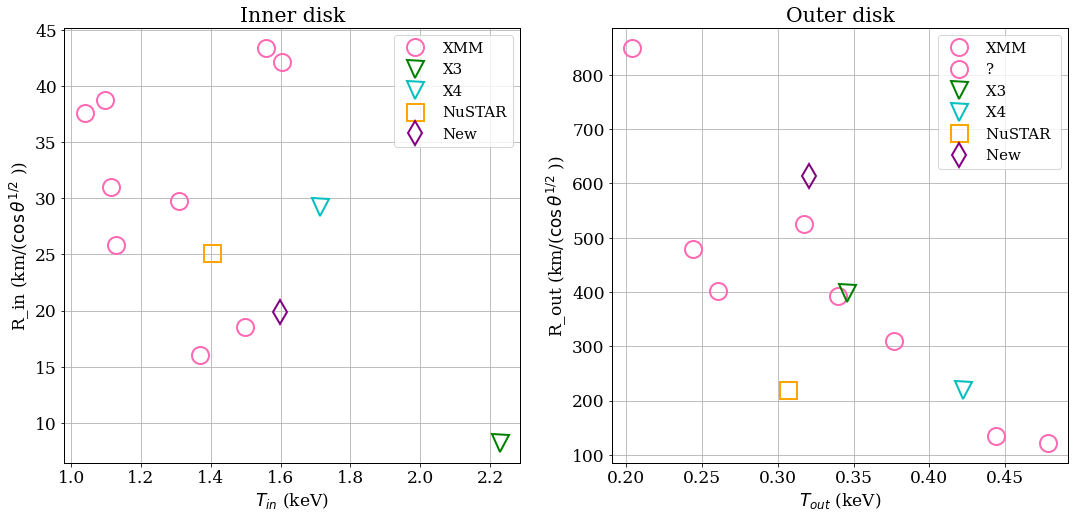

In [7]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 8))

markers=['o','v','s','d']
colour=['hotpink','green','c','orange','purple']
labels=['XMM','X3','X4','NuSTAR','New']

ax[0].errorbar(data['Th'][1:10],r_in[1:10], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2, label='XMM')
ax[0].errorbar(data['Th'][11],r_in[11], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')
ax[0].errorbar(data['Th'][12],r_in[12], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')
ax[0].errorbar(data['Th'][13],r_in[13], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')
ax[0].errorbar(data['Th'][14],r_in[14], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
ax[0].set_xlabel(r'$T_{in}$ (keV)')
ax[0].set_ylabel(r'R_in (km/($ \cos \theta ^{1/2}$ ))')
ax[0].set_title('Inner disk')
ax[0].legend(fontsize=15)



ax[1].errorbar(data['Tl'][1:5],r_out[1:5], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2, label='XMM')
ax[1].errorbar(data['Tl'][6],r_out[6], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'?')
ax[1].errorbar(data['Tl'][7:10],r_out[7:10], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2)
ax[1].errorbar(data['Tl'][11],r_out[11], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 ')
ax[1].errorbar(data['Tl'][12],r_out[12], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4 ')
ax[1].errorbar(data['Tl'][13],r_out[13], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR ')
ax[1].errorbar(data['Tl'][14],r_out[14], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New ')
ax[1].set_xlabel(r'$T_{out}$ (keV)')
ax[1].set_ylabel(r'R_out (km/($ \cos \theta ^{1/2}$ ))')
ax[1].set_title('Outer disk')
ax[1].legend(fontsize=15)

ax[0].grid()
ax[1].grid()
plt.show()
    

## -  Error calculation inner disk
The expression we'll use to calculate the R_in error is the following assuming $\theta=0$:



- Errores inner disk

In [8]:
deltaRm=  1/2*data['Th norm']**(-1/2)*((d10**2)/1)**(1/2)*data['Error -']
deltaRp=  1/2*data['Th norm']**(-1/2)*((d10**2)/1)**(1/2)*data['Error +']

In [9]:
deltaRm

0     -5.801773
1     -4.157068
2     -8.000845
3     -5.982573
4     -6.609485
5     -4.972104
6     -5.158325
7     -6.037196
8     -7.207967
9    -13.376433
10   -14.772649
11    -2.117385
12    -7.762198
13    -5.839214
14    -4.043141
dtype: float64

- Errores outer disk

In [10]:
deltaRm2=  1/2*data['norm']**(-1/2)*((d10**2)/1)**(1/2)*data['norm error -']
deltaRp2=  1/2*data['norm']**(-1/2)*((d10**2)/1)**(1/2)*data['norm error +']

In [11]:
data

,ObsID,N(10^22),N error +,N error -,Th,Th error(+),Th error(-),Th norm,Error +,Error -,Tl,Tl error(+),Tl error(-),norm,norm error +,norm error -,chi
0,840990101,0.075184,0.036285,-0.026425,1.08278,0.092954,-0.072784,0.011758,0.004120,-0.003723,0.281666,0.103765,-0.063403,0.766506,1.964130,-0.501825,276.38/255
1,861600101,0.075547,0.010907,-0.009816,1.30778,0.098720,-0.083397,0.007761,0.002694,-0.002167,0.317233,0.024349,-0.022834,2.408400,1.003490,-0.672215,739.11/708
2,804670201,0.100739,0.077784,-0.051869,1.12776,0.254188,-0.158017,0.005863,0.005551,-0.003625,0.260440,0.113827,-0.066152,1.417770,9.108190,-1.298570,71.93/104
3,804670301,0.065136,0.020483,-0.016188,1.36986,0.471246,-0.226673,0.002243,0.001887,-0.001677,0.444270,0.110176,-0.101017,0.158264,0.243220,-0.079097,310.06/232
4,804670401,0.114642,0.074698,-0.051858,1.11486,0.137950,-0.094267,0.008418,0.004062,-0.003588,0.243846,0.118703,-0.057729,2.006150,10.781700,-1.724730,167.91/159
5,804670501,0.054315,0.023716,-0.023512,1.03892,0.077874,-0.070903,0.012387,0.004353,-0.003274,0.306613,0.000000,0.000000,0.259790,0.196713,-0.186730,157.97/178
6,804670601,0.137273,0.063250,-0.050810,1.09784,0.077329,-0.067056,0.013128,0.004206,-0.003497,0.204129,0.061778,-0.034742,6.322580,20.481200,-5.104700,209.10/200
7,823410401,0.076144,0.023336,-0.017676,1.55748,0.116213,-0.080483,0.016490,0.004201,-0.004587,0.376824,0.133831,-0.081727,0.843476,1.787670,-0.572890,576.81/574
8,804670701,0.031288,0.032654,-0.021380,1.49755,1.038440,-0.299526,0.003008,0.004395,-0.002339,0.477995,0.219374,-0.163104,0.130251,0.373701,-0.073939,127.57 /140
9,823410301,0.074196,0.045846,-0.028793,1.60433,0.459659,-0.133882,0.015553,0.006421,-0.009871,0.339864,0.342178,-0.110496,1.347800,5.935380,-0.924186,289.78/314


### * Plot

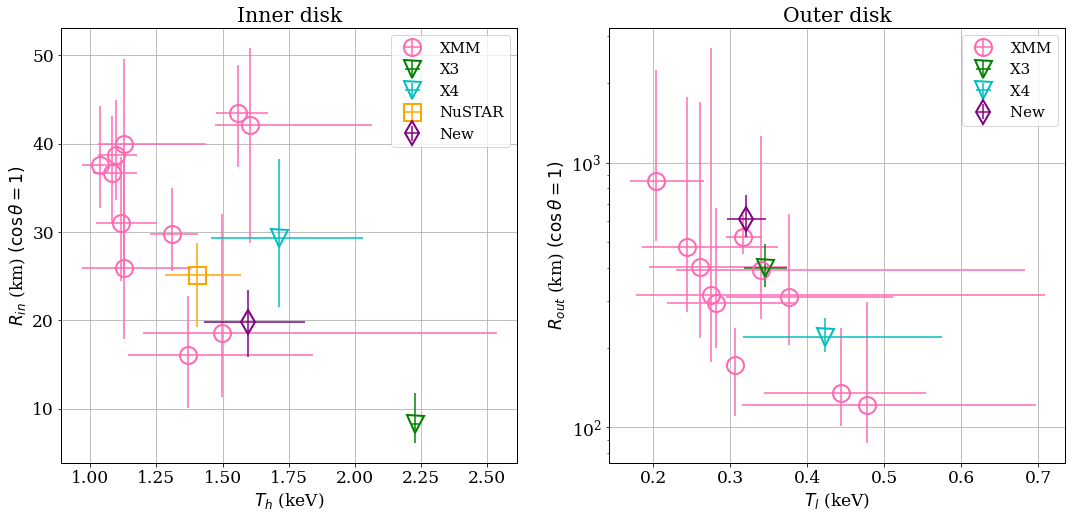

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 8))

markers=['o','v','s','d']
colour=['hotpink','green','c','orange','purple']
labels=['XMM','X3','X4','NuSTAR','New']

ax[0].errorbar(data['Th'][0:11],r_in[0:11], xerr=[abs(data['Th error(-)'][0:11]).tolist(),data['Th error(+)'][0:11].tolist()],yerr=[abs(deltaRm[0:11]).tolist(),abs(deltaRp[0:11]).tolist()],fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2, label='XMM')
ax[0].errorbar(data['Th'][11],r_in[11],xerr=[[abs(data['Th error(-)'][11])],[data['Th error(+)'][11]]], yerr=[[abs(deltaRm[11])],[abs(deltaRp[11])]],fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3')
ax[0].errorbar(data['Th'][12],r_in[12],xerr=[[abs(data['Th error(-)'][12])],[data['Th error(+)'][12]]], yerr=[[abs(deltaRm[12])],[abs(deltaRp[12])]],fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4')
ax[0].errorbar(data['Th'][13],r_in[13], xerr=[[abs(data['Th error(-)'][13])],[data['Th error(+)'][13]]],yerr=[[abs(deltaRm[13])],[abs(deltaRp[11])]],fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR')
ax[0].errorbar(data['Th'][14],r_in[14], xerr=[[abs(data['Th error(-)'][14])],[data['Th error(+)'][14]]],yerr=[[abs(deltaRm[14])],[abs(deltaRp[11])]],fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New')
ax[0].set_xlabel(r'$T_{h}$ (keV)')
ax[0].set_ylabel(r'$R_{in}$ (km) $({\cos \theta = 1})$')
ax[0].set_title('Inner disk')
ax[0].legend(fontsize=15)
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')



ax[1].errorbar(data['Tl'][0:7],r_out[0:7],xerr=[abs(data['Tl error(-)'][0:7]).tolist(),data['Tl error(+)'][0:7].tolist()],yerr=[abs(deltaRm2[0:7]).tolist(),abs(deltaRp2[0:7]).tolist()], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2, label='XMM')
#ax[1].errorbar(data['Tl'][6],r_out[6],xerr=[[abs(data['Tl error(-)'][6])],[data['Tl error(+)'][6]]],yerr=[[abs(deltaRm2[6])],[abs(deltaRp2[6])]], fmt='o',color='hotpink',mfc='none',markersize=17,markeredgewidth=2, label=r'?')
ax[1].errorbar(data['Tl'][7:11],r_out[7:11],xerr=[abs(data['Tl error(-)'][7:11]).tolist(),data['Tl error(+)'][7:11].tolist()],yerr=[abs(deltaRm2[7:11]).tolist(),abs(deltaRp2[7:11]).tolist()], fmt=markers[0],color=colour[0],mfc='none',markersize=17,markeredgewidth=2)
ax[1].errorbar(data['Tl'][11],r_out[11],xerr=[[abs(data['Tl error(-)'][11])],[data['Tl error(+)'][11]]],yerr=[[abs(deltaRm2[11])],[abs(deltaRp2[11])]], fmt='v',color='green',mfc='none',markersize=17,markeredgewidth=2, label=r'X3 ')
ax[1].errorbar(data['Tl'][12],r_out[12],xerr=[[abs(data['Tl error(-)'][12])],[data['Tl error(+)'][12]]],yerr=[[abs(deltaRm2[12])],[abs(deltaRp2[12])]], fmt='v',color='c',mfc='none',markersize=17,markeredgewidth=2, label=r'X4 ')
#ax[1].errorbar(data['Tl'][13],r_out[13],xerr=[[abs(data['Tl error(-)'][13])],[data['Tl error(+)'][13]]],yerr=[[abs(deltaRm2[13])],[abs(deltaRp2[13])]], fmt='s',color='orange',mfc='none',markersize=17,markeredgewidth=2, label=r'NuSTAR ')
ax[1].errorbar(data['Tl'][14],r_out[14],xerr=[[abs(data['Tl error(-)'][14])],[data['Tl error(+)'][14]]],yerr=[[abs(deltaRm2[14])],[abs(deltaRp2[14])]], fmt='d',color='purple',mfc='none',markersize=17,markeredgewidth=2, label=r'New ')
ax[1].set_xlabel(r'$T_{l}$ (keV)')
ax[1].set_ylabel(r'$R_{out}$ (km) $({\cos \theta = 1})$')
ax[1].set_title('Outer disk')
ax[1].legend(fontsize=15)
#ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].grid()
ax[1].grid()
plt.show()
    

In [13]:
r_in.max()

43.40412230652752

In [14]:
2500

2500

In [15]:
r_out[6]+deltaRp2[6]

2226.451582782255

## Degeneracies

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [17]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

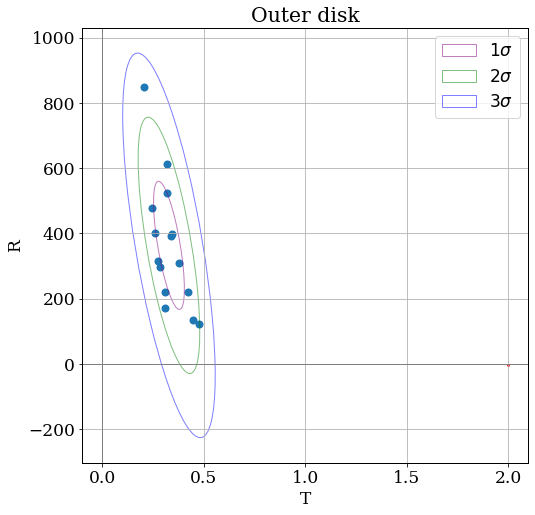

In [53]:
fig, ax_kwargs = plt.subplots(figsize=(8, 8))
dependency_kwargs = [[-0.8, 0.5],
                     [-0.2, 0.5]]
mu = 2, -3
scale = 6, 5

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

x=data['Tl']
y=r_out

# Plot the ellipse with zorder=0 in order to demonstrate
# its transparency (caused by the use of alpha).
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5, edgecolor='purple',n_std=1,label=r'$1\sigma$')
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5,  edgecolor='green',n_std=2,label=r'$2\sigma$')
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5,  edgecolor='blue',n_std=3,label=r'$3\sigma$')

ax_kwargs.scatter(x, y,linewidth=2,marker='o')
ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)
ax_kwargs.set_title('Outer disk')
ax_kwargs.set_xlabel('T')
ax_kwargs.set_ylabel('R')
ax_kwargs.legend()
ax_kwargs.grid()

fig.subplots_adjust(hspace=0.25)
plt.show()

In [55]:
a = np.corrcoef(x,y)
a

array([[ 1.        , -0.67668647],
       [-0.67668647,  1.        ]])

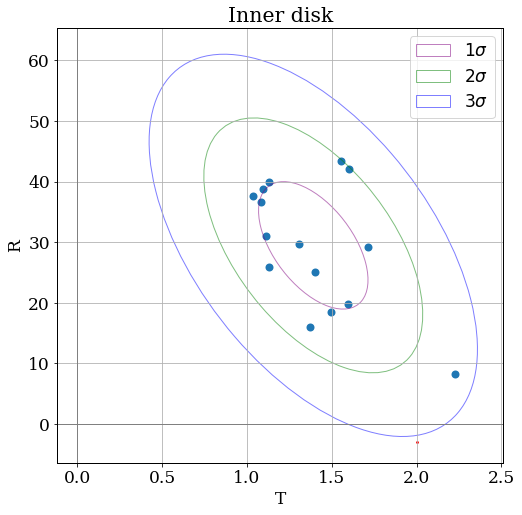

In [56]:
fig, ax_kwargs = plt.subplots(figsize=(8, 8))
dependency_kwargs = [[-0.8, 0.5],
                     [-0.2, 0.5]]
mu = 2, -3
scale = 6, 5

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

x=data['Th']
y=r_in

# Plot the ellipse with zorder=0 in order to demonstrate
# its transparency (caused by the use of alpha).
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5, edgecolor='purple',n_std=1,label=r'$1\sigma$')
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5,  edgecolor='green',n_std=2,label=r'$2\sigma$')
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5,  edgecolor='blue',n_std=3,label=r'$3\sigma$')

ax_kwargs.scatter(x, y,linewidth=2,marker='o')
ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)
ax_kwargs.set_title('Inner disk')
ax_kwargs.set_xlabel('T')
ax_kwargs.set_ylabel('R')
ax_kwargs.legend()
ax_kwargs.grid()
fig.subplots_adjust(hspace=0.25)
plt.show()

In [57]:
b = np.corrcoef(x,y)

In [58]:
b

array([[ 1.        , -0.54294415],
       [-0.54294415,  1.        ]])